In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [48]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

In [49]:
y_valid.shape

(10000,)

(50000, 784)


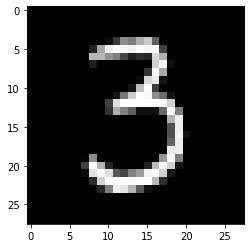

In [50]:
from matplotlib import pyplot as plt
import numpy as np

plt.imshow(x_train[50].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [53]:
torch.tensor(x_train)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [6]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [7]:
x_train.shape

torch.Size([50000, 784])

In [8]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [9]:
weights.argmin()

tensor(4096)

In [10]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    # @ = dot product
    return log_softmax(xb @ weights + bias)

In [11]:
x = torch.tensor([[1, 2,3, 4]])

In [12]:
x

tensor([[1, 2, 3, 4]])

In [13]:
x.unsqueeze(1).shape

torch.Size([1, 1, 4])

In [14]:
x.shape

torch.Size([1, 4])

In [15]:
y = torch.tensor([[1, 2],[3, 4]])

In [16]:
y.unsqueeze(1)

tensor([[[1, 2]],

        [[3, 4]]])

In [17]:
y.shape

torch.Size([2, 2])

In [18]:
y.unsqueeze(1).shape

torch.Size([2, 1, 2])

In [19]:
bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x
preds = model(xb)  # predictions
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.4925, -2.0708, -3.3481, -2.9486, -1.9830, -2.2611, -2.0306, -2.3089,
        -2.0453, -2.2849], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [20]:
preds[2]

tensor([-2.3156, -2.7476, -2.3398, -2.2731, -2.4189, -2.6368, -2.4201, -1.9261,
        -1.9033, -2.3692], grad_fn=<SelectBackward>)

In [21]:
def nll(input, target):
    # negative log likelihood
    # input = preds, target = actual labels
    # range 0,64
    # target val gives index into tensor
    # take mean of all preds?
    # preds already given in log of softmax likelihood, so just take negative
    # and average
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [22]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.4629, grad_fn=<NegBackward>)


In [23]:
-preds[range(0,64),yb].mean()

tensor(2.4629, grad_fn=<NegBackward>)

In [24]:
-preds[range(0,64)]

tensor([[2.4925, 2.0708, 3.3481, 2.9486, 1.9830, 2.2611, 2.0306, 2.3089, 2.0453,
         2.2849],
        [2.7040, 2.0292, 2.8860, 3.0940, 2.1691, 2.3970, 2.3477, 1.8913, 2.2260,
         1.9604],
        [2.3156, 2.7476, 2.3398, 2.2731, 2.4189, 2.6368, 2.4201, 1.9261, 1.9033,
         2.3692],
        [1.9397, 2.3239, 2.4062, 2.7792, 2.0980, 2.3475, 1.9272, 2.7014, 2.8125,
         2.1621],
        [2.6435, 2.2995, 2.5444, 2.9766, 1.8239, 2.4556, 2.1911, 2.1855, 1.7389,
         2.9573],
        [2.4268, 2.1632, 2.6023, 3.0094, 1.6068, 2.2377, 2.6596, 2.0795, 2.6057,
         2.3305],
        [2.2999, 2.4298, 2.3042, 2.9261, 1.8385, 2.4994, 2.3556, 2.0991, 2.2210,
         2.3954],
        [2.2409, 2.4880, 2.8667, 2.7289, 1.8841, 2.3895, 2.1950, 2.0858, 2.1771,
         2.3453],
        [2.4238, 2.4460, 2.2053, 2.7470, 2.0259, 2.3630, 2.3145, 2.2451, 2.1481,
         2.2733],
        [2.6126, 2.2645, 2.5877, 2.9000, 2.1517, 2.6701, 2.4138, 2.0921, 1.6986,
         2.1966],
        [2

In [25]:
yb

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])

In [26]:
def accuracy(out, yb):
    # feed actual preds in as out
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [27]:
print(accuracy(preds, yb))

tensor(0.0312)


In [28]:
lr = 0.5  # learning rate
epochs = 2  # how many epochs to train for

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs # batch starting place
        end_i = start_i + bs # batch size from start
        xb = x_train[start_i:end_i] # get examples and labels
        yb = y_train[start_i:end_i]
        pred = model(xb)# make predictions - multiply inputs @ weights + bias, log softmax
        loss = loss_func(pred, yb) # nll of preds

        loss.backward() # update gradients
        with torch.no_grad(): # actually update values in weights/bias based on gradient and lr
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_() # reset gradients to 0 after update
            bias.grad.zero_()

/home/ewilson6/anaconda3/envs/torch/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607369981906/work/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


In [29]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))


tensor(0.0808, grad_fn=<NegBackward>) tensor(1.)


In [30]:
40 // 3

13

# Now using nn functions

In [31]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb):
    # redefine without softmax
    return xb @ weights + bias

In [32]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))


tensor(0.0808, grad_fn=<NllLossBackward>) tensor(1.)


In [33]:
from torch import nn
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        # same as "model()" from before
        return xb @ self.weights + self.bias

In [34]:
model = Mnist_Logistic()

In [35]:
print(loss_func(model(xb), yb))

tensor(2.4087, grad_fn=<NllLossBackward>)


In [36]:
def fit():
    # training function
    for epoch in range(epochs):
        for i in range((n - 1) // bs + 1):
            start_i = i * bs
            end_i = start_i + bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            with torch.no_grad():
                for p in model.parameters(): # auto update all parameters defined in MnistLogistic
                    p -= p.grad * lr
                model.zero_grad()

fit()

In [37]:
print(loss_func(model(xb), yb))


tensor(0.0807, grad_fn=<NllLossBackward>)


In [38]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        # lin wraps up the weights/bias dot product from before
        return self.lin(xb)
    
model = Mnist_Logistic()
print(loss_func(model(xb), yb))

tensor(2.3508, grad_fn=<NllLossBackward>)


In [39]:
fit()

print(loss_func(model(xb), yb))

tensor(0.0815, grad_fn=<NllLossBackward>)


In [40]:
from torch import optim


In [41]:
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr=lr)

model, opt = get_model()
print(loss_func(model(xb), yb))

# same as fit()
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        # instead of updating params, the optimizer just does that in Step
        opt.step()
        opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(2.4161, grad_fn=<NllLossBackward>)
tensor(0.0805, grad_fn=<NllLossBackward>)


In [42]:
from torch.utils.data import TensorDataset,DataLoader

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs)


In [47]:
x_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [43]:
train_ds.tensors[1].shape

torch.Size([50000])

In [44]:
model, opt = get_model()

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        xb, yb = train_ds[i * bs: i * bs + bs]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(0.0820, grad_fn=<NllLossBackward>)


In [141]:
for x,y in train_dl:
    print(x.shape, y.shape)

torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) tor

torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) tor

torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) torch.Size([64])
torch.Size([64, 784]) tor

In [142]:
model, opt = get_model()

for epoch in range(epochs):
    for xb, yb in train_dl:
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(0.0811, grad_fn=<NllLossBackward>)


# adding validation

In [45]:
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [46]:
x_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [145]:
model, opt = get_model()

for epoch in range(5):
    model.train() # sets training mode to True, doesn't actually train
    for xb, yb in train_dl:
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

    model.eval()
    with torch.no_grad():
        valid_loss = sum(loss_func(model(xb), yb) for xb, yb in valid_dl)

    print(epoch, valid_loss / len(valid_dl))

0 tensor(0.3281)
1 tensor(0.2953)
2 tensor(0.3267)
3 tensor(0.2866)
4 tensor(0.2672)


In [147]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

In [150]:
import numpy as np

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        # why multiply losses by len of batch?
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)

In [151]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [153]:
# whole training process?
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(8, model, loss_func, opt, train_dl, valid_dl)

0 0.3085571125268936
1 0.4064069236278534
2 0.2768992762565613
3 0.3202983641266823
4 0.299762332046032
5 0.2895145841956139
6 0.341851800596714
7 0.3360989359021187


# CNN 

In [154]:
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

lr = 0.1

In [155]:
model = Mnist_CNN()
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.3383253442287445
1 0.22268746160268785


In [157]:
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)


def preprocess(x):
    return x.view(-1, 1, 28, 28)

In [160]:
model = nn.Sequential(
    Lambda(preprocess),
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [161]:
fit(epochs, model, loss_func, opt, train_dl, valid_dl)


0 0.3603972136259079
1 0.21820324252843856


In [162]:
def preprocess(x, y):
    return x.view(-1, 1, 28, 28), y


class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [165]:
train_dl.func

<function __main__.preprocess(x, y)>

In [166]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [168]:
fit(8, model, loss_func, opt, train_dl, valid_dl)

0 0.2402871753692627
1 0.1963001360177994
2 0.1785460590481758
3 0.1790879687666893
4 0.16472950867414474
5 0.14510966917276383
6 0.14869890780448913
7 0.14343947072029115


In [169]:
print(torch.cuda.is_available())


False
